In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
import joblib

In [3]:
car_data=pd.read_csv('cab_rides.csv')

In [4]:
car_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
car_data.shape

(693071, 10)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [7]:
print(f"Memory usage by Car Ride Dataset: {round(car_data.memory_usage().sum()/1024**2,2)} MB")

Memory usage by Car Ride Dataset: 52.88 MB


In [8]:
car_data['Date-Time']=pd.to_datetime(car_data.time_stamp)

#Data Visualization

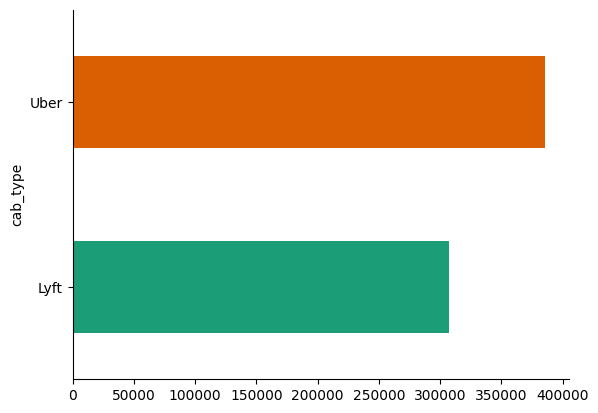

In [9]:
car_data.groupby('cab_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In the above output we represented a horizontal bar chart displaying the counts of each unique value in the "cab_type" column

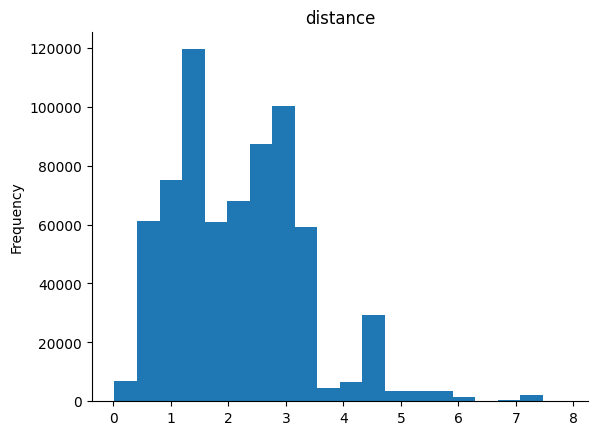

In [10]:
car_data['distance'].plot(kind='hist', bins=20, title='distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

In the above output we can see the histogram of the distance people prefer or travel using cab_rides
Most people prefer a distance from 1 to 1.5km to travel from these cab_rides

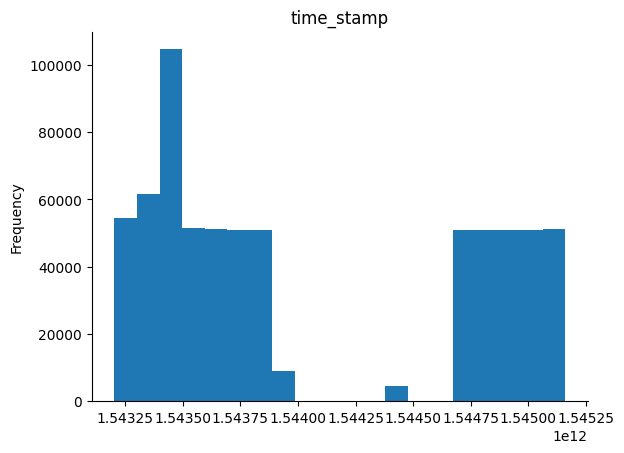

In [11]:
car_data['time_stamp'].plot(kind='hist', bins=20, title='time_stamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

In the above output we can see the histogram of the time_stamp people prefer or travel using cab_rides

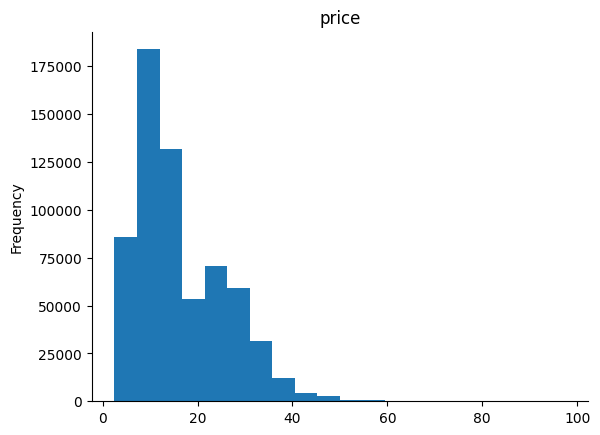

In [12]:
car_data['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In the above output we can see the histogram of the price of the cab_rides

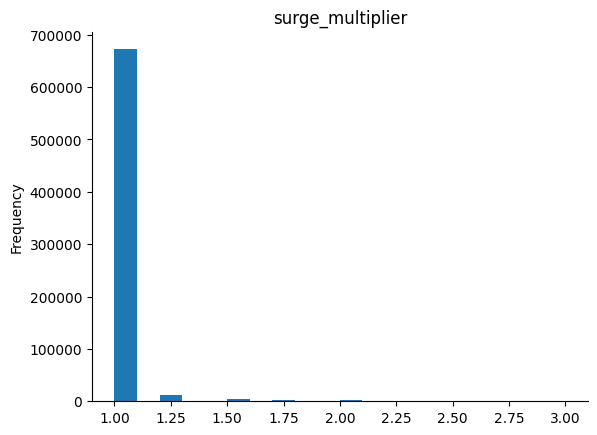

In [13]:
car_data['surge_multiplier'].plot(kind='hist', bins=20, title='surge_multiplier')
plt.gca().spines[['top', 'right',]].set_visible(False)

In the above output we represent the hitogram of a surge_mutiplier and the most people prefer it to be 1.0

In [14]:
car_data = car_data[car_data['cab_type'] != 0]
car_data["cab_type"].value_counts()

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

<Axes: xlabel='cab_type'>

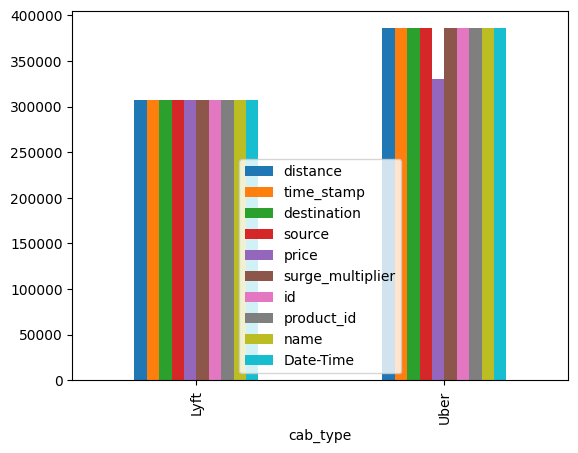

In [15]:
car_data.groupby("cab_type").count().plot.bar()

In the above bar plot we represented the separate groups for each unique cabtype i.e., for Lyft and uber and representing the count occurrences in each group with different colour usage
According to this observation most people prefer uber over Lyft considering various factors.

C:\Users\Khadar Basha\AppData\Local\Temp\ipykernel_13180\795061821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="source",data=car_data,palette="tab10")


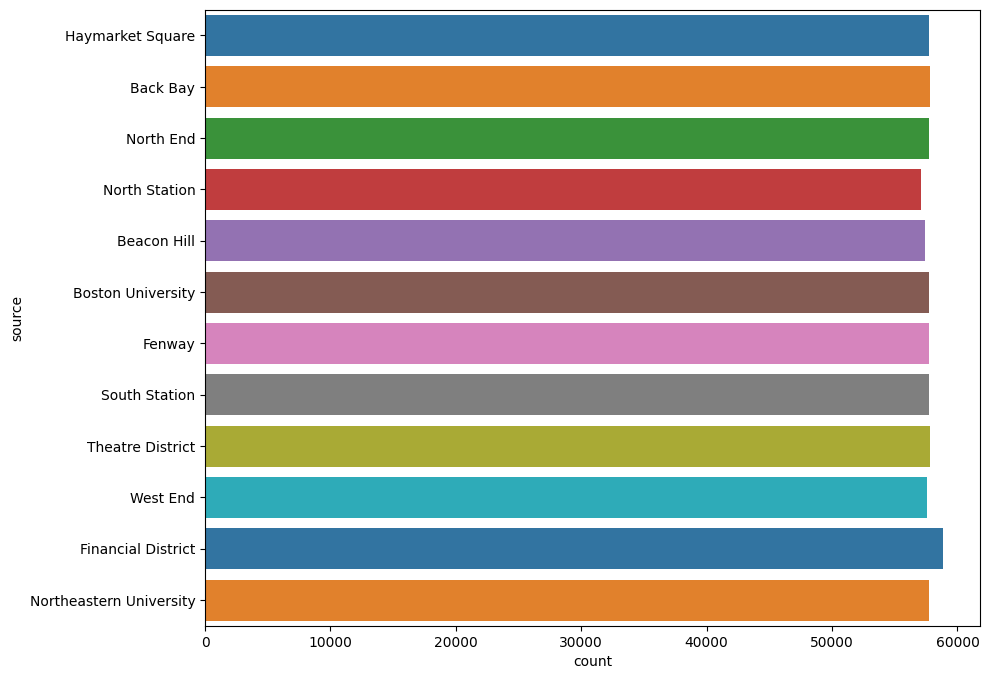

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(y="source",data=car_data,palette="tab10")
plt.show()

In the above countplot we represented the source places of the people.
Most of the people travel from North Station to reach their respective destinations


C:\Users\Khadar Basha\AppData\Local\Temp\ipykernel_13180\3058777145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="destination",data=car_data,palette="tab10")


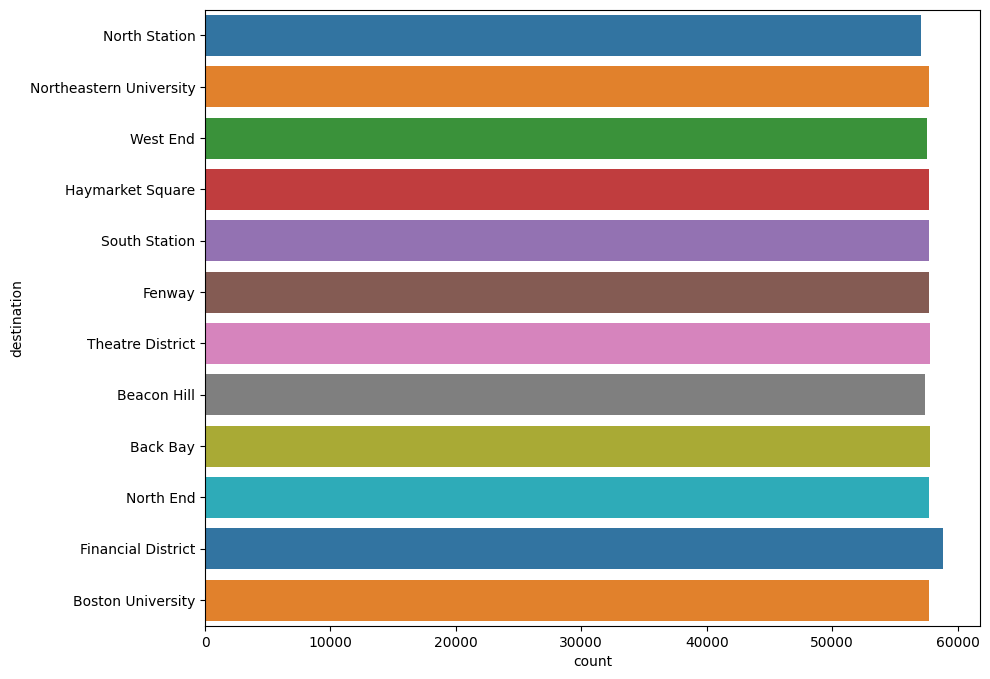

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(y="destination",data=car_data,palette="tab10")
plt.show()

In the above countplot we represented the destination places of people .
Most of the people travel to Northeastern University as detinations using these cab rides

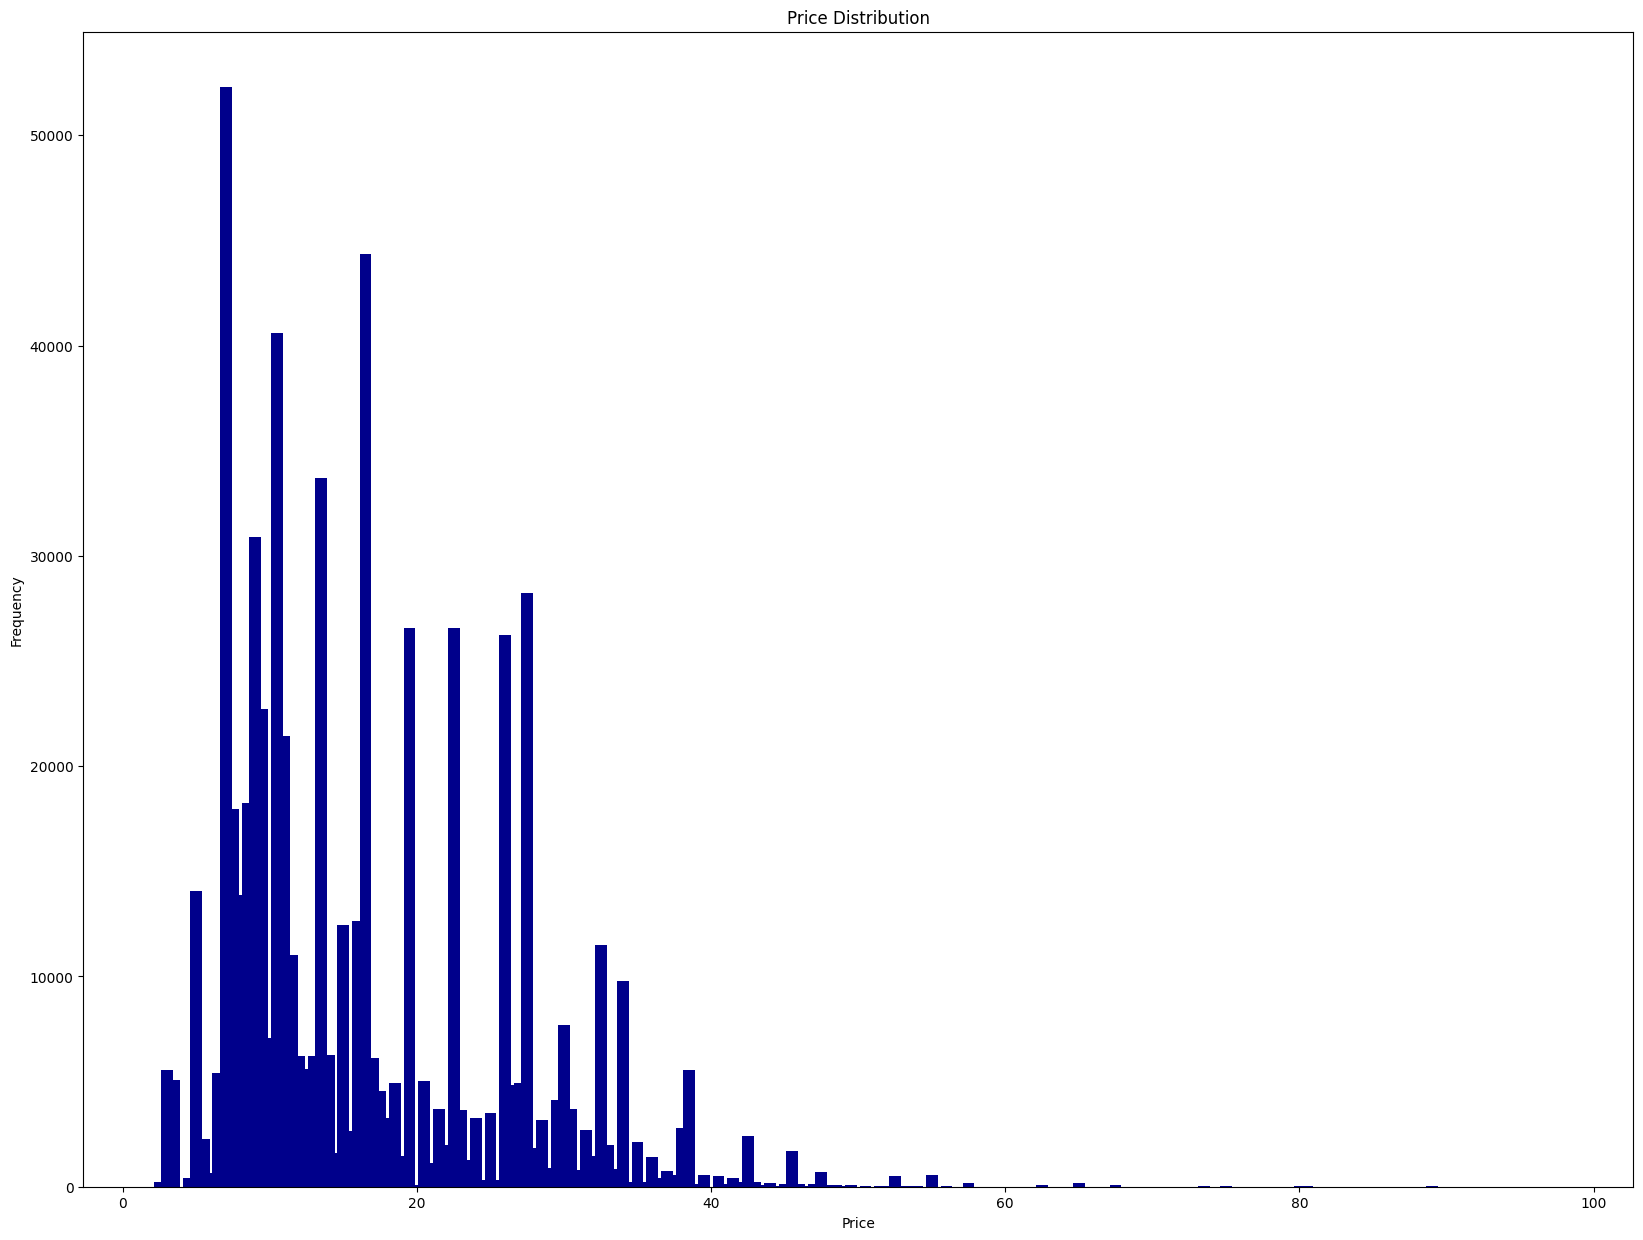

In [18]:
price_counts = car_data["price"].value_counts()
plt.figure(figsize=(20,15))
plt.bar(price_counts.index, price_counts.values, color='darkblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

The above bar chart is used to visualize the distribution of prices in the "price" column, providing insights into the frequency of different price levels in the dataset.

In [19]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          693071 non-null  float64       
 1   cab_type          693071 non-null  object        
 2   time_stamp        693071 non-null  int64         
 3   destination       693071 non-null  object        
 4   source            693071 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  693071 non-null  float64       
 7   id                693071 non-null  object        
 8   product_id        693071 non-null  object        
 9   name              693071 non-null  object        
 10  Date-Time         693071 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 58.2+ MB


In [20]:
car_data['Time']=car_data['Date-Time'].dt.time

In [21]:
car_data['Date']=car_data['Date-Time'].dt.date

In [22]:
car_data['Hour']=car_data['Date-Time'].dt.hour

In [23]:
car_data.Date.unique()

array([datetime.date(1970, 1, 1)], dtype=object)

In [24]:
car_data.sample()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,Date-Time,Time,Date,Hour
116312,4.74,Lyft,1545019811061,Financial District,Boston University,9.0,1.0,42f396a9-7bd4-4445-a15b-35e927235c4c,lyft_line,Shared,1970-01-01 00:25:45.019811061,00:25:45.019811,1970-01-01,0


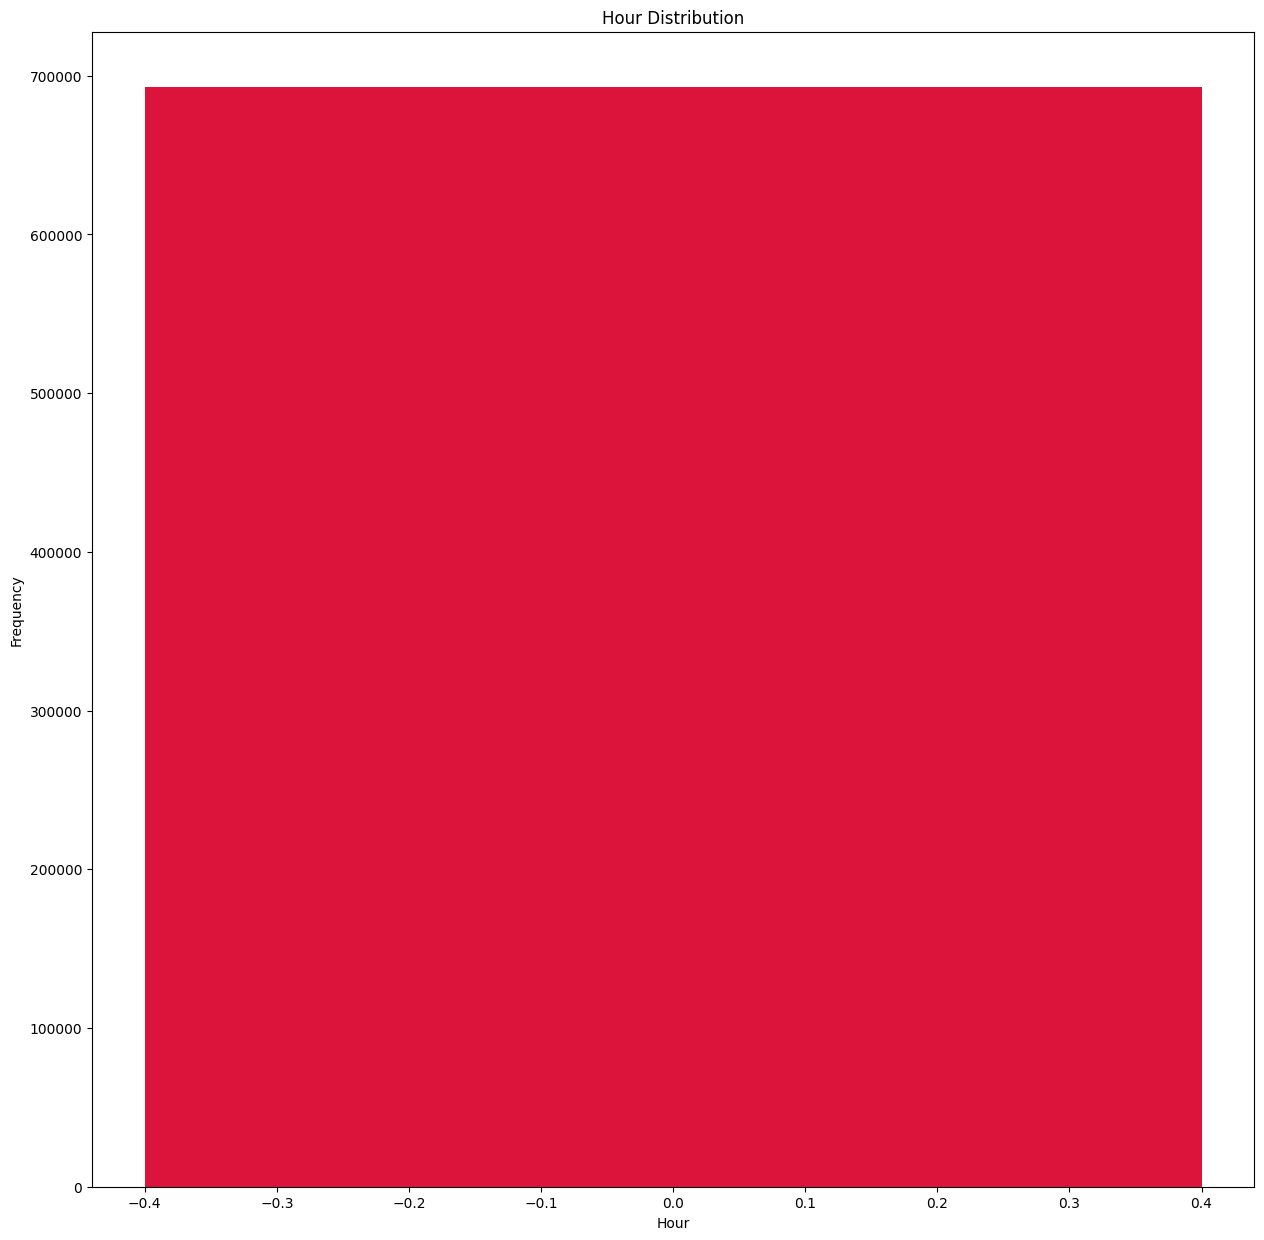

In [25]:
price_counts = car_data["Hour"].value_counts()
plt.figure(figsize=(15,15))
plt.bar(price_counts.index, price_counts.values, color="crimson")
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Hour Distribution')
plt.show()

The above bar chart is used to visualize the distribution of hours in the "Hour" column, providing insights into the frequency of different hours in the dataset.

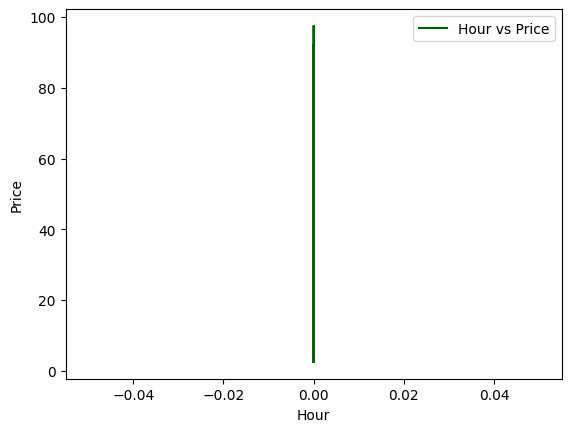

In [26]:
x=car_data["Hour"]
y=car_data["price"]
plt.plot(x,y,color="darkgreen",label="Hour vs Price")
plt.xlabel("Hour")
plt.ylabel("Price")
plt.legend()
plt.show()

 The above line plot is used to visualize the relationship between the "hour" and "price" columns in the Dataset,allowing us to visually assess how the price varies across different hours

In [27]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# cab_rides.csv has 693071 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('cab_rides.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'cab_rides.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 10 columns


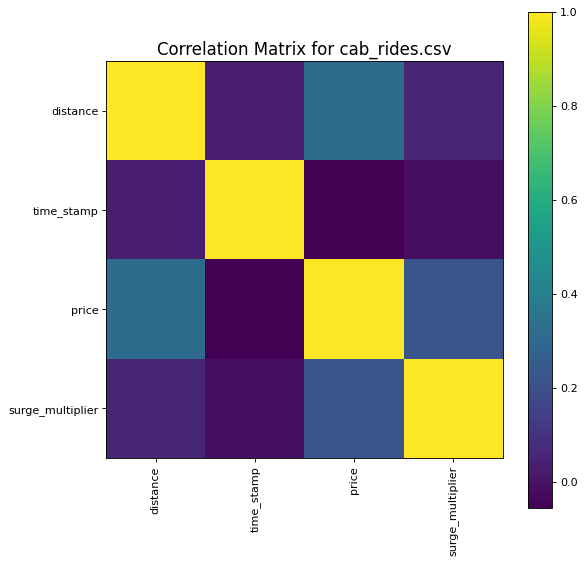

In [28]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    numeric_df = df.select_dtypes(include=['number'])
    
    if numeric_df.shape[1] < 2:
        print(f'No correlation plots shown: The number of numeric columns ({numeric_df.shape[1]}) is less than 2')
        return
    
    corr = numeric_df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(df1, 8)


In the above output we reprsented the correlation matrix for the cab_rides dataset.

In [29]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

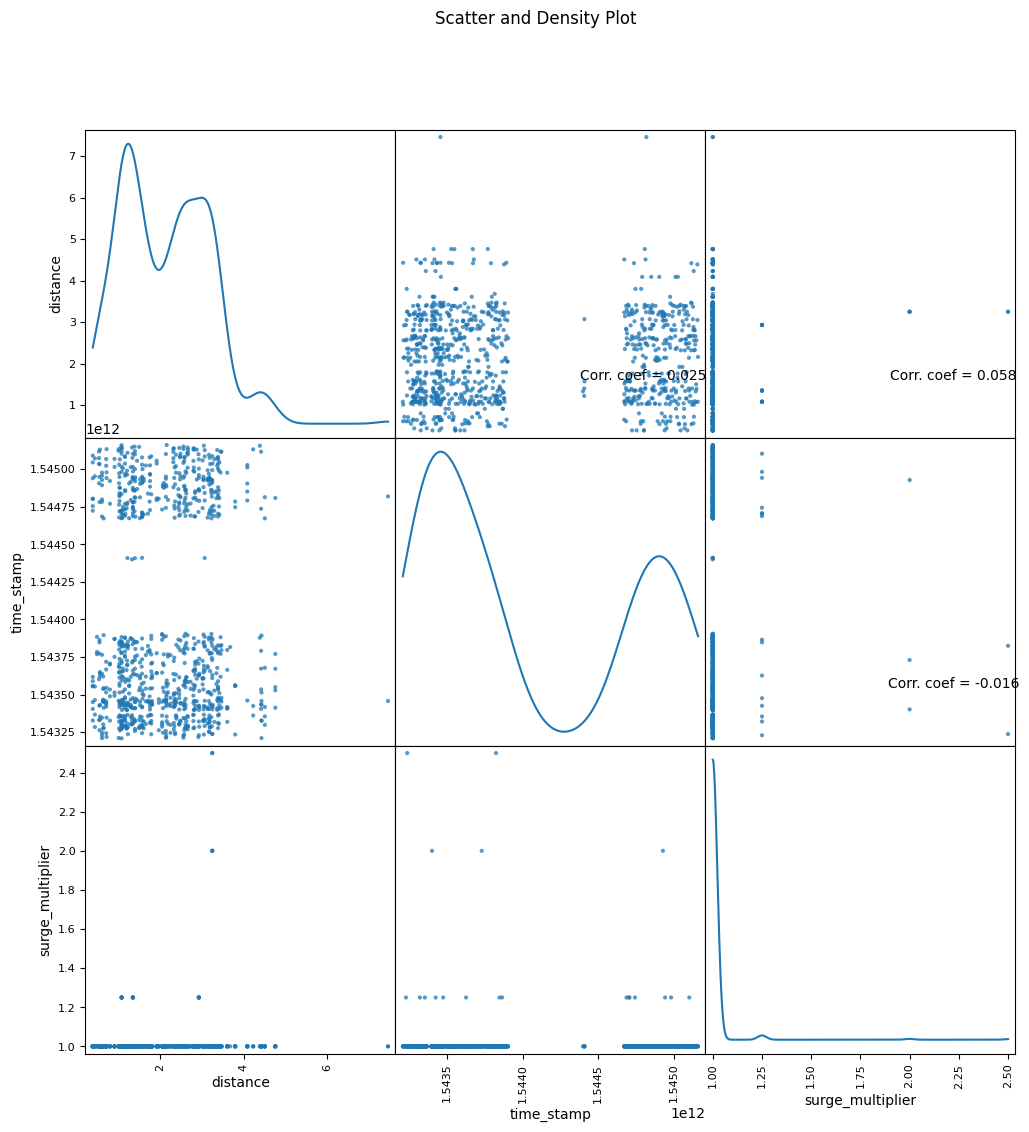

In [30]:
plotScatterMatrix(df1, 12, 10)

In the above output we represent the scatter and density plots of the cab_rides dataset

In [31]:
!pip install sweetviz

In [32]:
pip install setuptools


In [33]:
pip install distutils


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


c:\Users\Khadar Basha\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:05 -> (00:00 left)



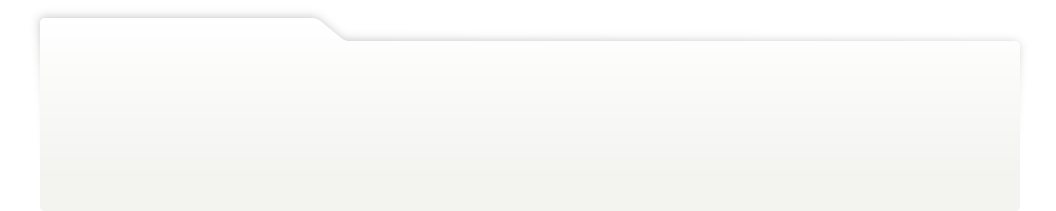
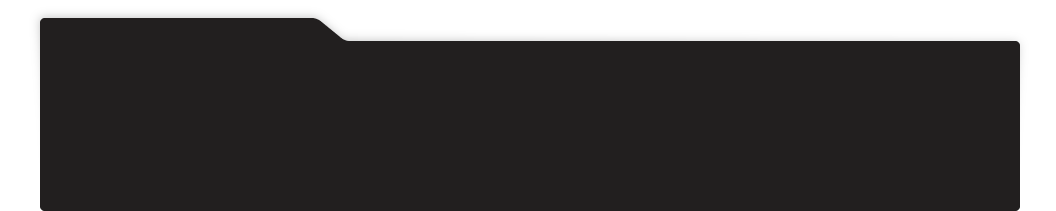
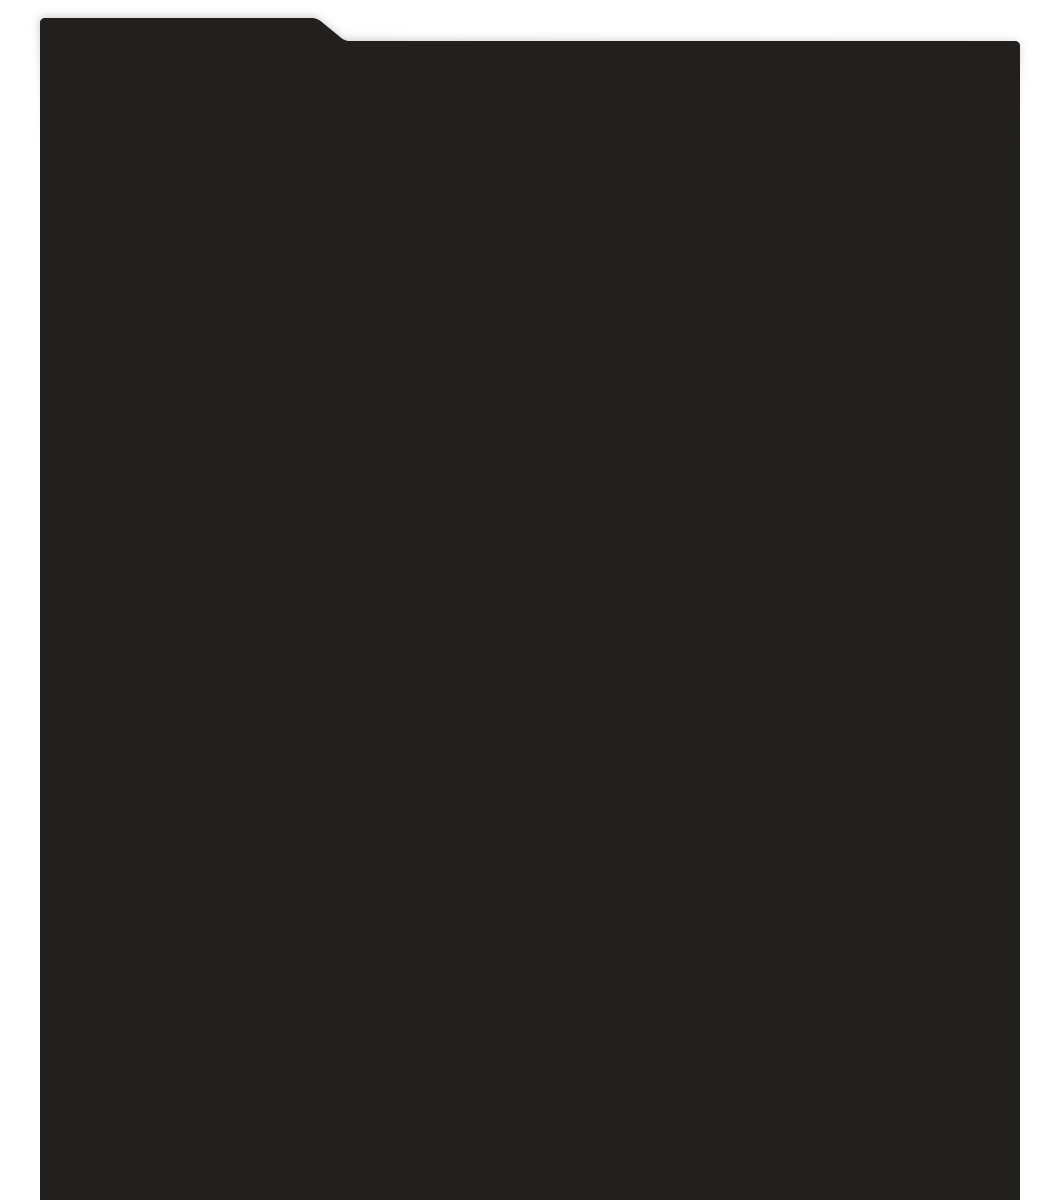
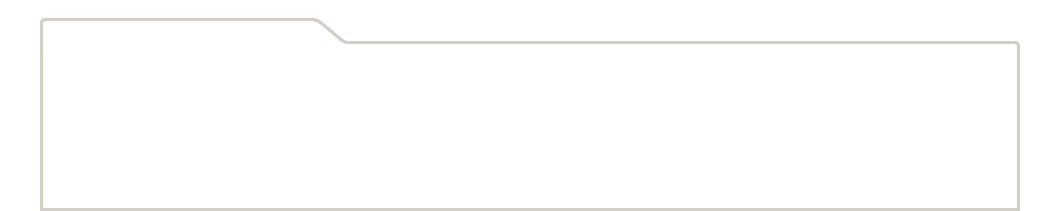
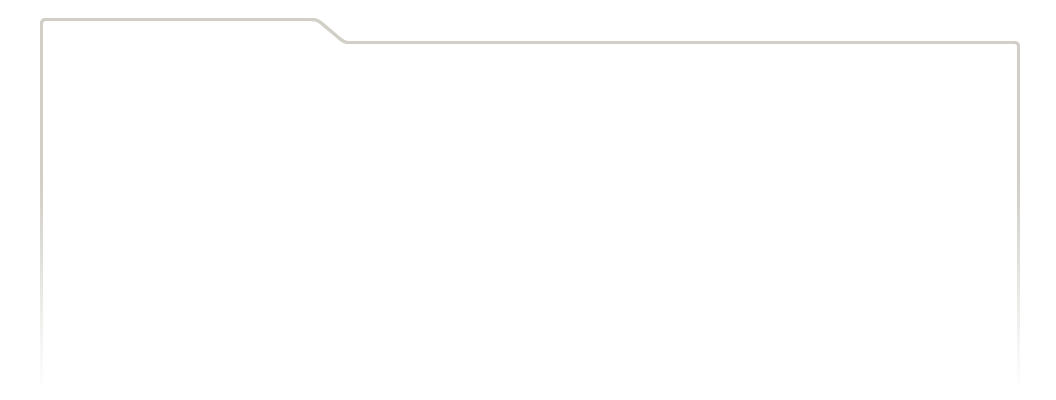
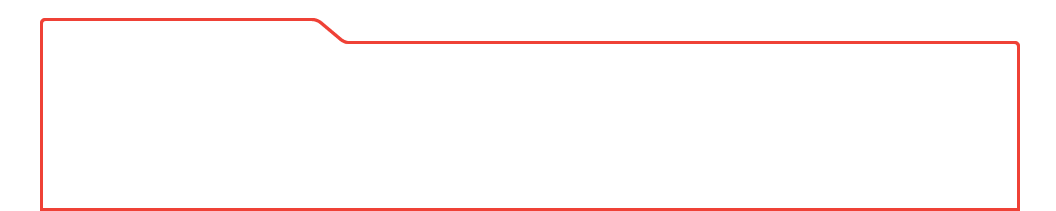
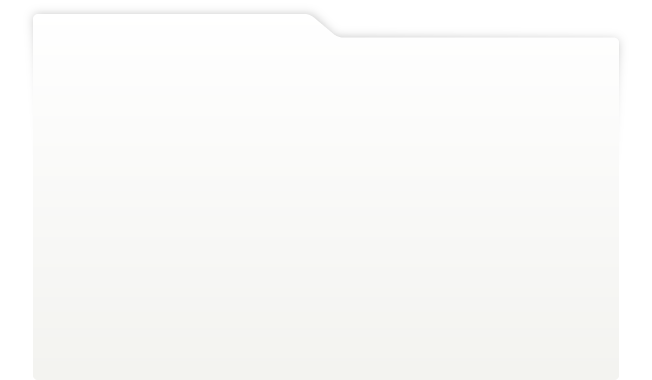
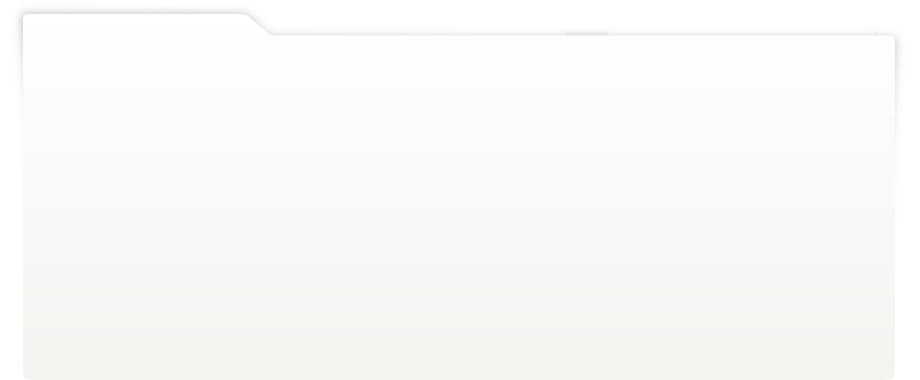
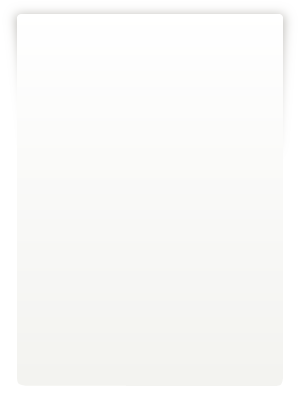
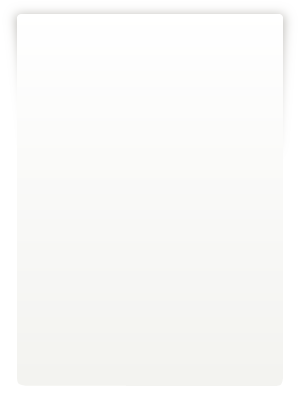
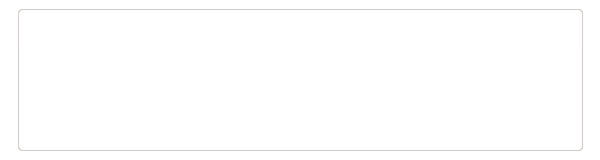
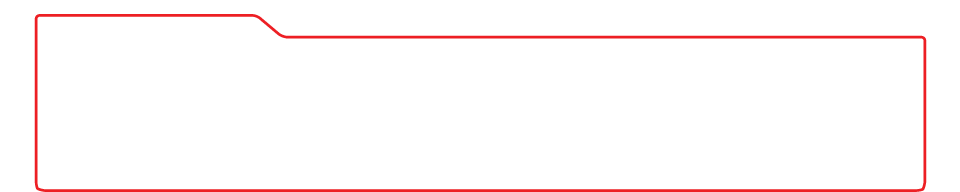
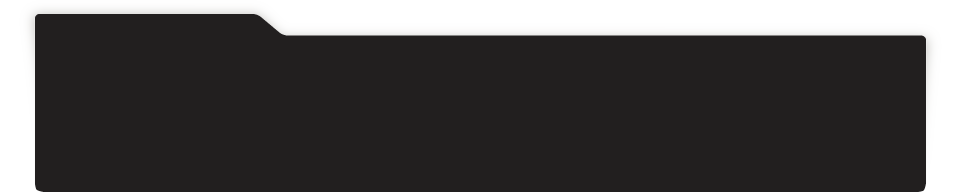
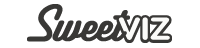
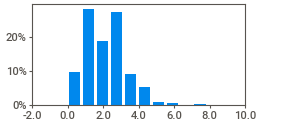
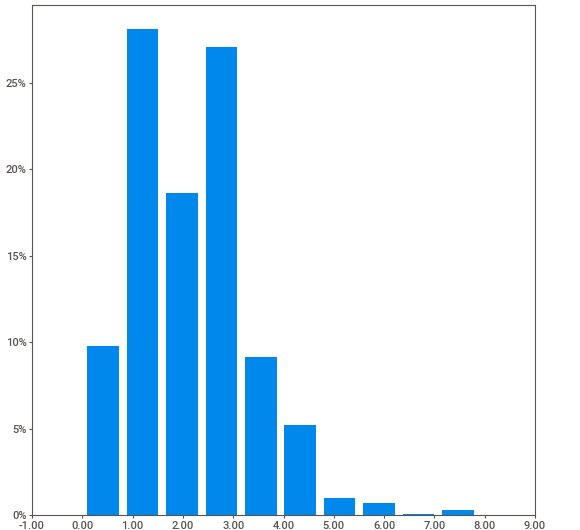
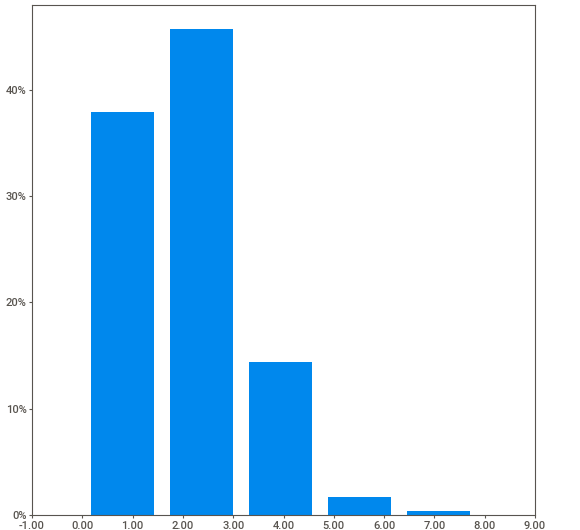
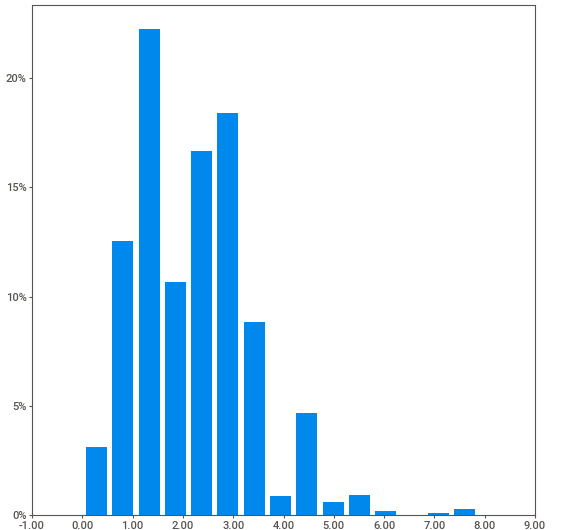
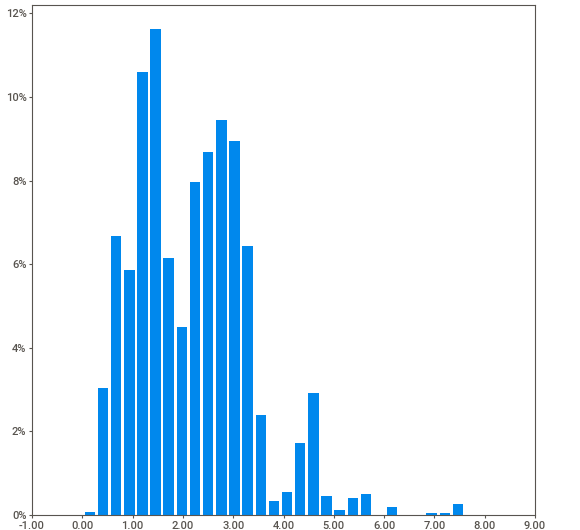
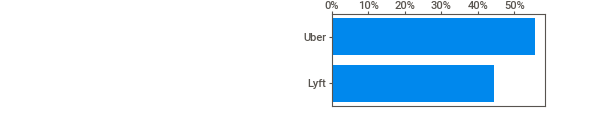
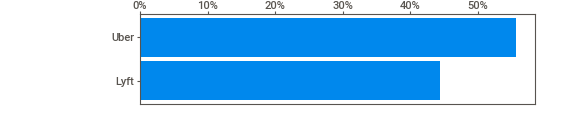
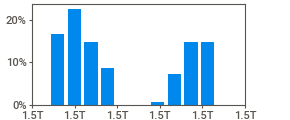
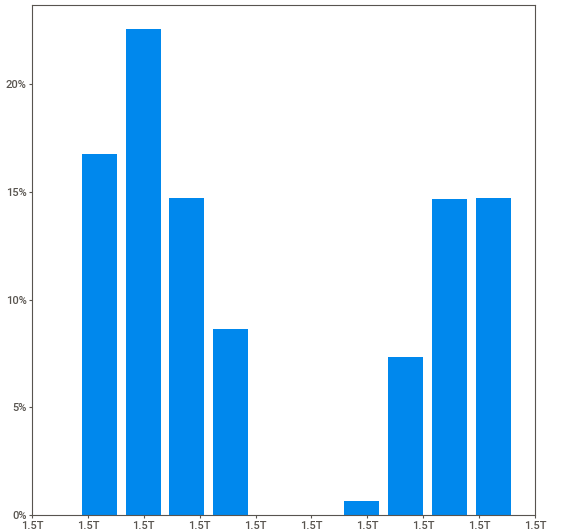
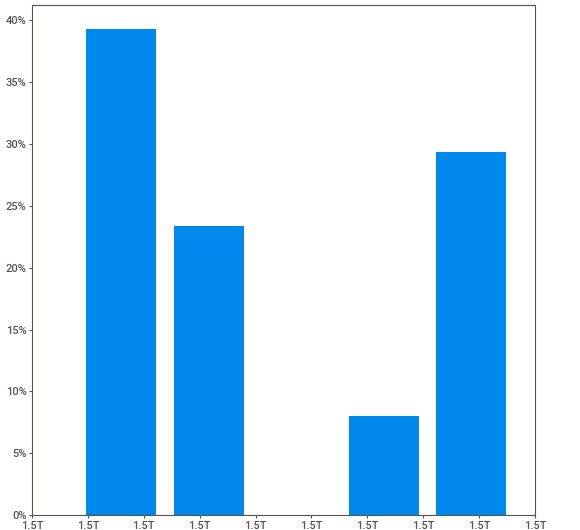
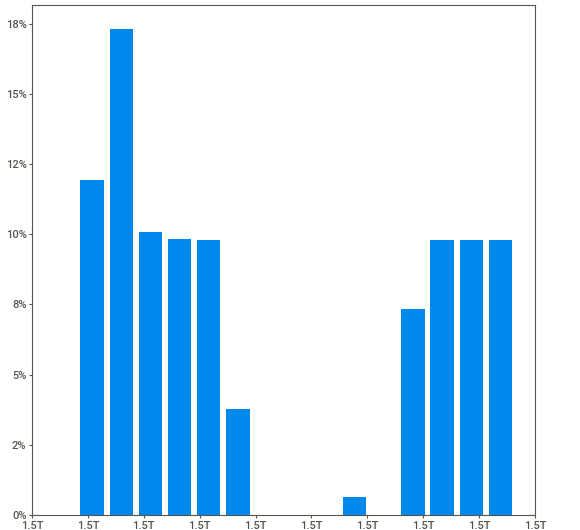
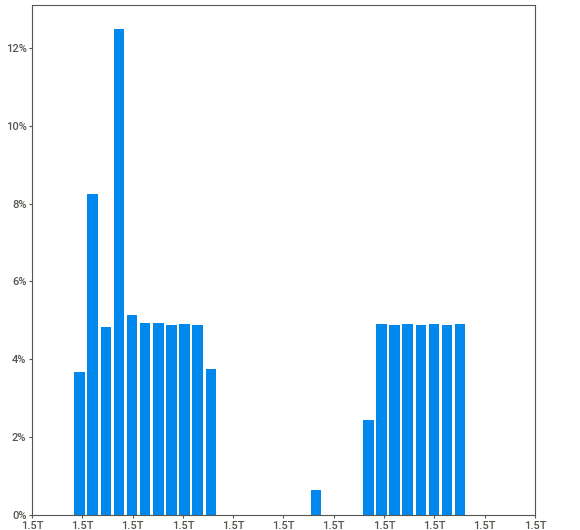
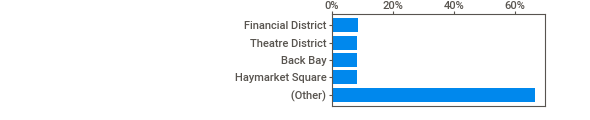
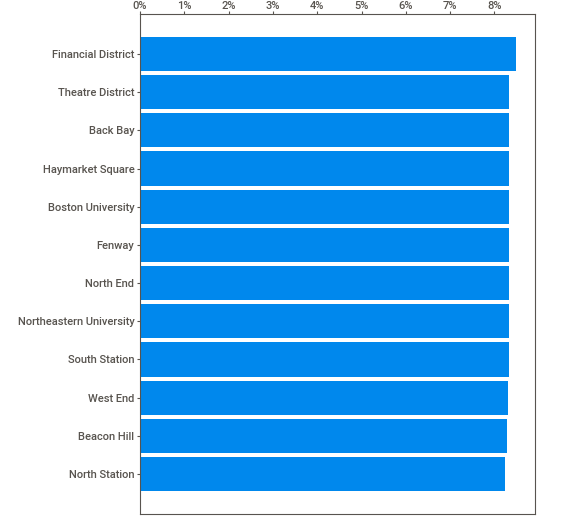
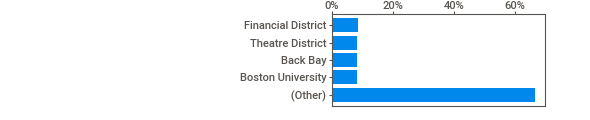
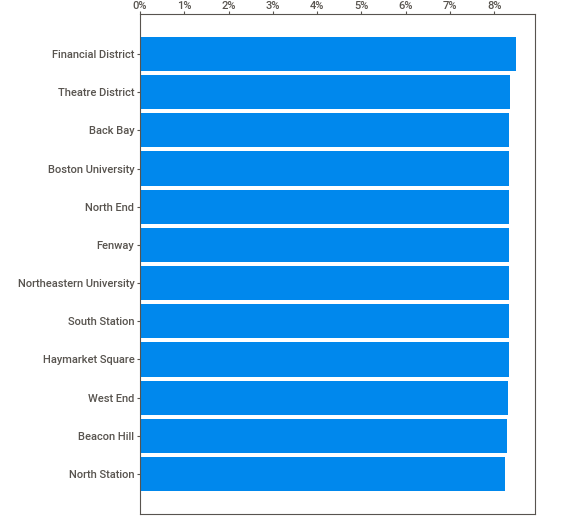
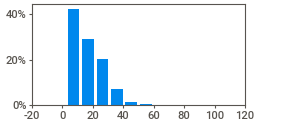
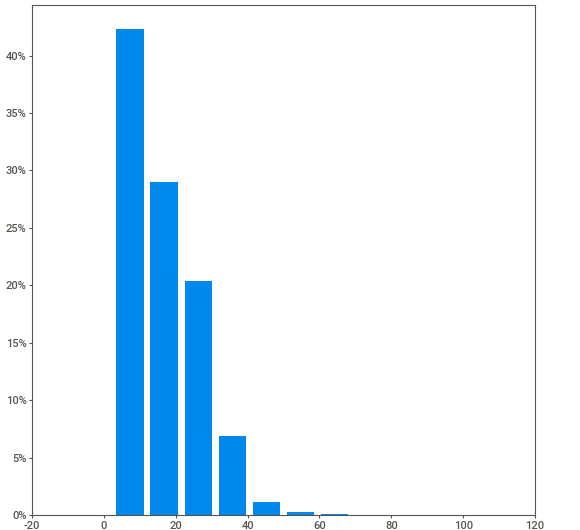
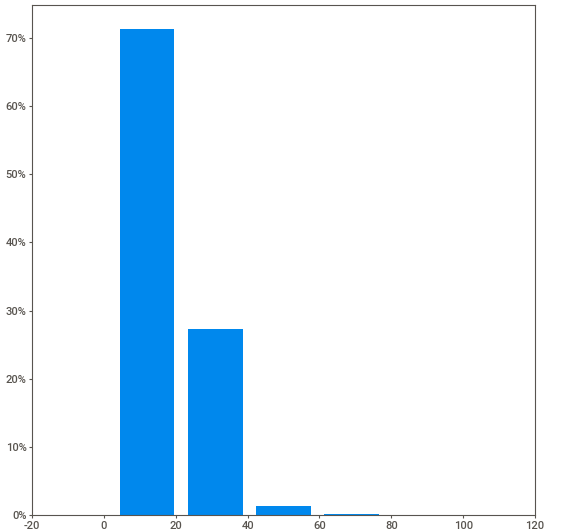
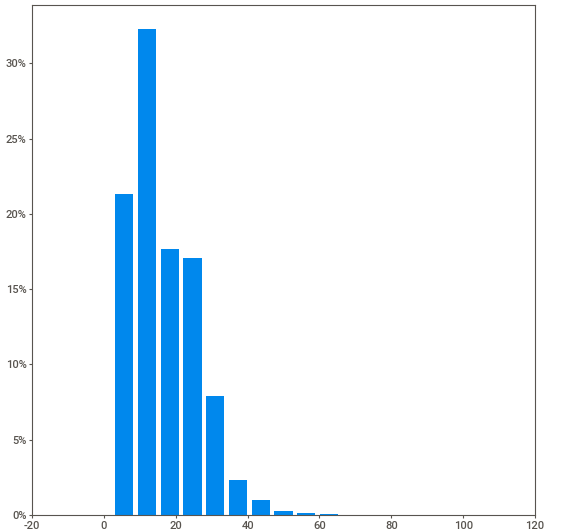
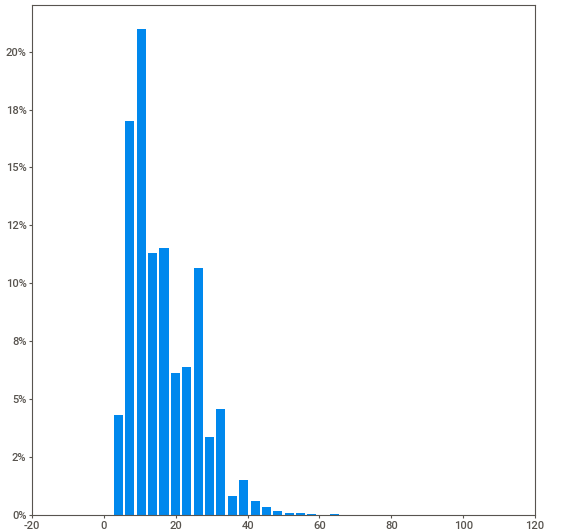
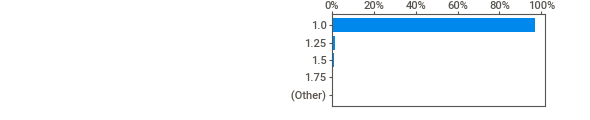
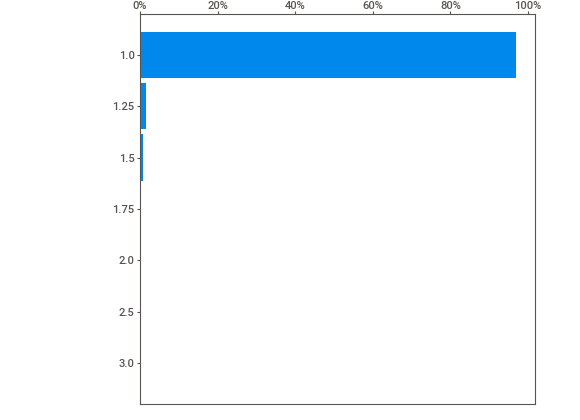
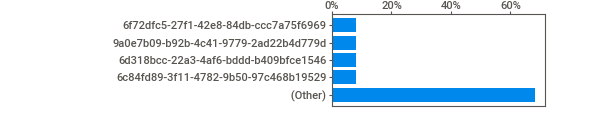
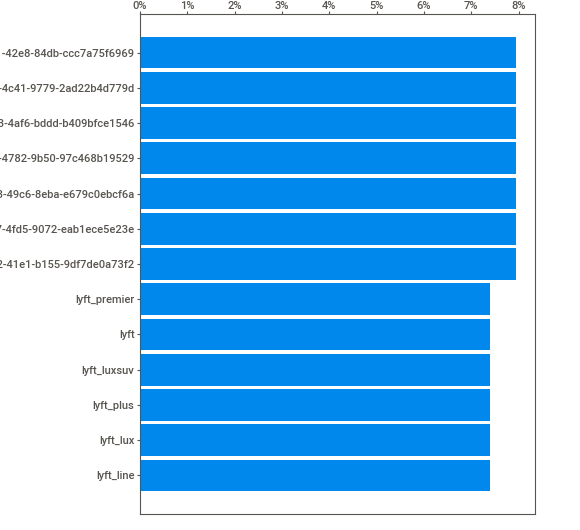
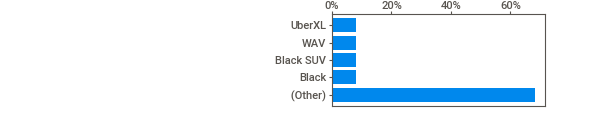
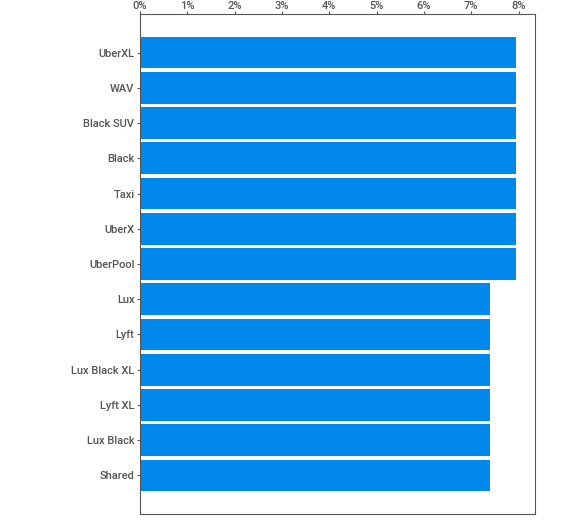
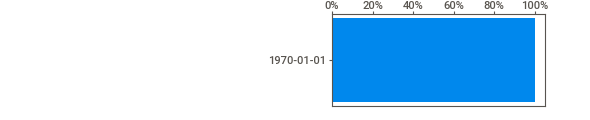
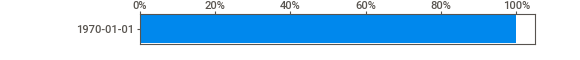
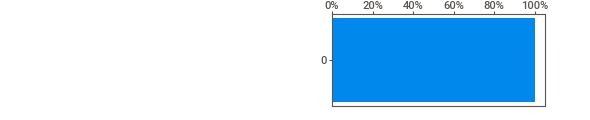
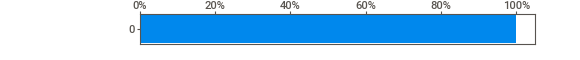
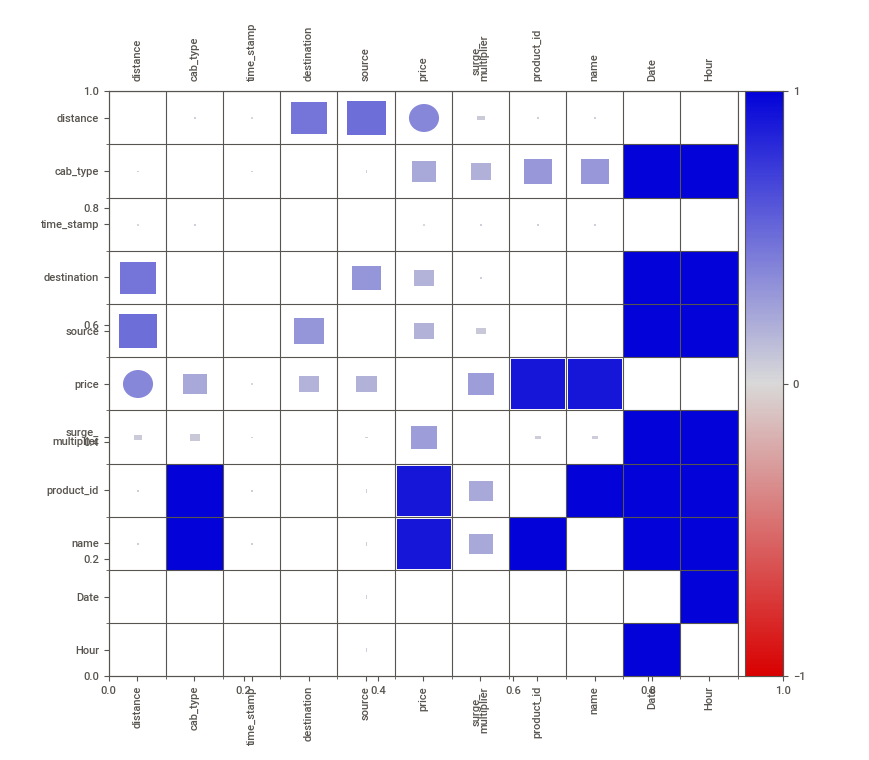
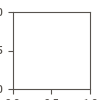

In [34]:
import sweetviz as sv
analyze_report = sv.analyze(car_data)
analyze_report.show_notebook(layout="widescreen")

In [31]:
car_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'Date-Time', 'Time',
       'Date', 'Hour'],
      dtype='object')

In [31]:
uber=car_data[car_data.cab_type=='Uber'].drop(['time_stamp','cab_type','Date-Time', 'Time','Date', 'Hour'],axis=1)


In [32]:
uber.head()

,distance,destination,source,price,surge_multiplier,id,product_id,name
12,1.11,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
13,1.11,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black
14,1.11,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
15,1.11,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
16,1.11,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [33]:
uber.shape

(385663, 8)

In [34]:
uber.isnull().sum()

distance                0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [35]:
uber.dropna(inplace=True)

In [36]:
uber.isnull().sum()

distance            0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [37]:
uber= uber[uber['name'] != 0]
uber["name"].value_counts()

name
UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
UberX        55094
UberPool     55091
Name: count, dtype: int64

In [38]:
uber.shape

(330568, 8)

In [39]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330568 entries, 12 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          330568 non-null  float64
 1   destination       330568 non-null  object 
 2   source            330568 non-null  object 
 3   price             330568 non-null  float64
 4   surge_multiplier  330568 non-null  float64
 5   id                330568 non-null  object 
 6   product_id        330568 non-null  object 
 7   name              330568 non-null  object 
dtypes: float64(3), object(5)
memory usage: 22.7+ MB


In [40]:
print(f"Memory usage by Uber Ride Dataset: {round(uber.memory_usage().sum()/1024**2,2)} MB")


Memory usage by Uber Ride Dataset: 22.7 MB


In [41]:
categories=[]
for el in uber.columns:
    if uber[el].dtype=='object':
        categories.append(el)

In [42]:
categories

['destination', 'source', 'id', 'product_id', 'name']

In [43]:
uber.nunique()

distance               422
destination             12
source                  12
price                  127
surge_multiplier         1
id                  330568
product_id               6
name                     6
dtype: int64

In [44]:
# Categories to be Encoded are: Destination,Source,Product Id and Name
cat_encode=['destination','source','product_id','name']


In [45]:
uber.destination.unique().sort()==uber.source.unique().sort()

True

In [46]:
uber.head()

,distance,destination,source,price,surge_multiplier,id,product_id,name
12,1.11,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
13,1.11,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black
14,1.11,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
15,1.11,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
16,1.11,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [47]:
uber.dtypes

distance            float64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [49]:
X=uber.drop(['price','id','surge_multiplier'],axis=1)
y=uber['price']

In [50]:
X.sample()

,distance,destination,source,product_id,name
422018,0.91,Beacon Hill,Haymarket Square,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330568 entries, 12 to 693070
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   distance     330568 non-null  float64
 1   destination  330568 non-null  object 
 2   source       330568 non-null  object 
 3   product_id   330568 non-null  object 
 4   name         330568 non-null  object 
dtypes: float64(1), object(4)
memory usage: 15.1+ MB


In [52]:
#Converting Dataframes to Numpy Arrays for K-fold Cross Validation
X = X.values
y = y.values

In [53]:
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

In [55]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [56]:
# Define a preprocessing pipeline
trf = ColumnTransformer([
    ('encode_destination', OneHotEncoder(drop='first', handle_unknown='ignore'), [1]),
    ('encode_source', OneHotEncoder(drop='first', handle_unknown='ignore'), [2]),
    ('encode_product_id', OneHotEncoder(drop='first', handle_unknown='ignore'), [3]),
    ('encode_name', OneHotEncoder(drop='first', handle_unknown='ignore'), [4]),
], remainder='passthrough')


#1.Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

lr = Pipeline([
    ('trf', trf),
    ('model', LinearRegression())
])
lr.fit(X_train, y_train)
for train_index, val_index in kf.split(X_train):
    
    X_fold_train, X_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_val = y_train[train_index], y_train[val_index]

    lr.fit(X_fold_train, y_fold_train)
    y_pred_val = lr.predict(X_val)
    
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_scores.append(mse_val)
    
    r2_val = r2_score(y_val, y_pred_val)
    r2_scores.append(r2_val)
# Calculate the mean and standard deviation of Mean Squared Error values and R-squared values on the validation sets
mean_mse_val = np.mean(mse_scores)
std_mse_val = np.std(mse_scores)

mean_r2_val = np.mean(r2_scores)
std_r2_val = np.std(r2_scores)

print(f'Mean Squared Error across {num_splits}-fold cross-validation on validation sets: {mean_mse_val:.4f} +/- {std_mse_val:.4f}')
print(f'Mean R-squared across {num_splits}-fold cross-validation on validation sets: {mean_r2_val:.4f} +/- {std_r2_val:.4f}')
y_pred_test = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error on the test set: {mse_test:.4f}')
print(f'R-squared on the test set: {r2_test:.4f}')

Mean Squared Error across 5-fold cross-validation on validation sets: 5.7815 +/- 0.1164
Mean R-squared across 5-fold cross-validation on validation sets: 0.9213 +/- 0.0014
Mean Squared Error on the test set: 5.7320
R-squared on the test set: 0.9208


#2.Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr= Pipeline([
    ('trf', trf),
    ('model',  DecisionTreeRegressor(random_state=42))
])
for train_index, val_index in kf.split(X_train):
    
    X_fold_train, X_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_val = y_train[train_index], y_train[val_index]

    
    dtr.fit(X_fold_train, y_fold_train)
    y_pred_val = dtr.predict(X_val)
    
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_scores.append(mse_val)
    
    r2_val = r2_score(y_val, y_pred_val)
    r2_scores.append(r2_val)
# Calculate the mean and standard deviation of Mean Squared Error values and R-squared values on the validation sets
mean_mse_val = np.mean(mse_scores)
std_mse_val = np.std(mse_scores)

mean_r2_val = np.mean(r2_scores)
std_r2_val = np.std(r2_scores)
print(f'Mean Squared Error across {num_splits}-fold cross-validation on validation sets: {mean_mse_val:.4f} +/- {std_mse_val:.4f}')
print(f'Mean R-squared across {num_splits}-fold cross-validation on validation sets: {mean_r2_val:.4f} +/- {std_r2_val:.4f}')
y_pred_test = dtr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error on the test set: {mse_test:.4f}')
print(f'R-squared on the test set: {r2_test:.4f}')

Mean Squared Error across 5-fold cross-validation on validation sets: 4.6579 +/- 1.1302
Mean R-squared across 5-fold cross-validation on validation sets: 0.9366 +/- 0.0154
Mean Squared Error on the test set: 3.5264
R-squared on the test set: 0.9513


#3.RandomForest

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your train and test data
# Assuming kf is your KFold cross-validator
num_splits = 3  # Number of splits for cross-validation
mse_scores = []  # List to store Mean Squared Error values
r2_scores = []   # List to store R-squared values


# Define the pipeline including preprocessing and RandomForestRegressor model
pipe_rf = Pipeline([
    ('trf', trf),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Iterate over the splits for cross-validation
for train_index, val_index in kf.split(X_train):
    X_fold_train, X_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_val = y_train[train_index], y_train[val_index]

    # Train the pipeline
    pipe_rf.fit(X_fold_train, y_fold_train)
    
    # Predict on the validation set
    y_pred_val = pipe_rf.predict(X_val)
    
    # Calculate and store evaluation metrics
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_scores.append(mse_val)
    
    r2_val = r2_score(y_val, y_pred_val)
    r2_scores.append(r2_val)

# Calculate the mean and standard deviation of Mean Squared Error values and R-squared values on the validation sets
mean_mse_val = np.mean(mse_scores)
std_mse_val = np.std(mse_scores)

mean_r2_val = np.mean(r2_scores)
std_r2_val = np.std(r2_scores)
print(f'Mean Squared Error across {num_splits}-fold cross-validation on validation sets: {mean_mse_val:.4f} +/- {std_mse_val:.4f}')
print(f'Mean R-squared across {num_splits}-fold cross-validation on validation sets: {mean_r2_val:.4f} +/- {std_r2_val:.4f}')

# Evaluate on the test set
y_pred_test = pipe_rf.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error on the test set: {mse_test:.4f}')
print(f'R-squared on the test set: {r2_test:.4f}')


Mean Squared Error across 3-fold cross-validation on validation sets: 3.5083 +/- 0.0756
Mean R-squared across 3-fold cross-validation on validation sets: 0.9523 +/- 0.0009
Mean Squared Error on the test set: 3.4754
R-squared on the test set: 0.9522


#4.SVM

In [73]:
from sklearn.svm import SVR
svm =Pipeline([
    ('trf', trf),
    ('model',  SVR())
])
for train_index, val_index in kf.split(X_train):
    
    X_fold_train, X_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_val = y_train[train_index], y_train[val_index]

    
    svm.fit(X_fold_train, y_fold_train)
    y_pred_val = svm.predict(X_val)
    
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_scores.append(mse_val)
    
    r2_val = r2_score(y_val, y_pred_val)
    r2_scores.append(r2_val)
# Calculate the mean and standard deviation of Mean Squared Error values and R-squared values on the validation sets
mean_mse_val = np.mean(mse_scores)
std_mse_val = np.std(mse_scores)

mean_r2_val = np.mean(r2_scores)
std_r2_val = np.std(r2_scores)
print(f'Mean Squared Error across {num_splits}-fold cross-validation on validation sets: {mean_mse_val:.4f} +/- {std_mse_val:.4f}')
print(f'Mean R-squared across {num_splits}-fold cross-validation on validation sets: {mean_r2_val:.4f} +/- {std_r2_val:.4f}')
y_pred_test = svm.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error on the test set: {mse_test:.4f}')
print(f'R-squared on the test set: {r2_test:.4f}')

#5.KNN

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn = Pipeline([
    ('trf', trf),
    ('model', KNeighborsRegressor(n_neighbors=32))
])
for train_index, val_index in kf.split(X_train):
    
    X_fold_train, X_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_val = y_train[train_index], y_train[val_index]

    
    knn.fit(X_fold_train, y_fold_train)
    y_pred_val = knn.predict(X_val)
    
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_scores.append(mse_val)
    
    r2_val = r2_score(y_val, y_pred_val)
    r2_scores.append(r2_val)
# Calculate the mean and standard deviation of Mean Squared Error values and R-squared values on the validation sets
mean_mse_val = np.mean(mse_scores)
std_mse_val = np.std(mse_scores)

mean_r2_val = np.mean(r2_scores)
std_r2_val = np.std(r2_scores)
print(f'Mean Squared Error across {num_splits}-fold cross-validation on validation sets: {mean_mse_val:.4f} +/- {std_mse_val:.4f}')
print(f'Mean R-squared across {num_splits}-fold cross-validation on validation sets: {mean_r2_val:.4f} +/- {std_r2_val:.4f}')
y_pred_test = knn.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error on the test set: {mse_test:.4f}')
print(f'R-squared on the test set: {r2_test:.4f}')

Mean Squared Error across 5-fold cross-validation on validation sets: 3.6384 +/- 0.1159
Mean R-squared across 5-fold cross-validation on validation sets: 0.9505 +/- 0.0014
Mean Squared Error on the test set: 3.6057
R-squared on the test set: 0.9502


#6.XGB

In [59]:
from xgboost import XGBRegressor
xgb =Pipeline([
    ('trf', trf),
    ('model', XGBRegressor())
])
for train_index, val_index in kf.split(X_train):
    
    X_fold_train, X_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_val = y_train[train_index], y_train[val_index]

    
    xgb.fit(X_fold_train, y_fold_train)
    y_pred_val = xgb.predict(X_val)
    
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_scores.append(mse_val)
    
    r2_val = r2_score(y_val, y_pred_val)
    r2_scores.append(r2_val)
# Calculate the mean and standard deviation of Mean Squared Error values and R-squared values on the validation sets
mean_mse_val = np.mean(mse_scores)
std_mse_val = np.std(mse_scores)

mean_r2_val = np.mean(r2_scores)
std_r2_val = np.std(r2_scores)
print(f'Mean Squared Error across {num_splits}-fold cross-validation on validation sets: {mean_mse_val:.4f} +/- {std_mse_val:.4f}')
print(f'Mean R-squared across {num_splits}-fold cross-validation on validation sets: {mean_r2_val:.4f} +/- {std_r2_val:.4f}')
y_pred_test = xgb.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error on the test set: {mse_test:.4f}')
print(f'R-squared on the test set: {r2_test:.4f}')

Mean Squared Error across 5-fold cross-validation on validation sets: 3.5453 +/- 0.1495
Mean R-squared across 5-fold cross-validation on validation sets: 0.9518 +/- 0.0019
Mean Squared Error on the test set: 3.4283
R-squared on the test set: 0.9526


#7.Lasso

In [60]:
from sklearn.linear_model import Lasso
lasso_model =Pipeline([
    ('trf', trf),
    ('model', Lasso(alpha=1.0))
])
for train_index, val_index in kf.split(X_train):
    
    X_fold_train, X_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_val = y_train[train_index], y_train[val_index]

    
    lasso_model.fit(X_fold_train, y_fold_train)
    y_pred_val = lasso_model.predict(X_val)
    
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_scores.append(mse_val)
    
    r2_val = r2_score(y_val, y_pred_val)
    r2_scores.append(r2_val)
# Calculate the mean and standard deviation of Mean Squared Error values and R-squared values on the validation sets
mean_mse_val = np.mean(mse_scores)
std_mse_val = np.std(mse_scores)

mean_r2_val = np.mean(r2_scores)
std_r2_val = np.std(r2_scores)
print(f'Mean Squared Error across {num_splits}-fold cross-validation on validation sets: {mean_mse_val:.4f} +/- {std_mse_val:.4f}')
print(f'Mean R-squared across {num_splits}-fold cross-validation on validation sets: {mean_r2_val:.4f} +/- {std_r2_val:.4f}')
y_pred_test =lasso_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error on the test set: {mse_test:.4f}')
print(f'R-squared on the test set: {r2_test:.4f}')

Mean Squared Error across 5-fold cross-validation on validation sets: 12.2285 +/- 12.2813
Mean R-squared across 5-fold cross-validation on validation sets: 0.8336 +/- 0.1671
Mean Squared Error on the test set: 29.3660
R-squared on the test set: 0.5943


#8.GradientBoostingRegressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
regressor =Pipeline([
    ('trf', trf),
    ('model', GradientBoostingRegressor())
])
for train_index, val_index in kf.split(X_train):
    
    X_fold_train, X_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_val = y_train[train_index], y_train[val_index]

    
    regressor.fit(X_fold_train, y_fold_train)
    y_pred_val = regressor.predict(X_val)
    
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_scores.append(mse_val)
    
    r2_val = r2_score(y_val, y_pred_val)
    r2_scores.append(r2_val)
# Calculate the mean and standard deviation of Mean Squared Error values and R-squared values on the validation sets
mean_mse_val = np.mean(mse_scores)
std_mse_val = np.std(mse_scores)

mean_r2_val = np.mean(r2_scores)
std_r2_val = np.std(r2_scores)
print(f'Mean Squared Error across {num_splits}-fold cross-validation on validation sets: {mean_mse_val:.4f} +/- {std_mse_val:.4f}')
print(f'Mean R-squared across {num_splits}-fold cross-validation on validation sets: {mean_r2_val:.4f} +/- {std_r2_val:.4f}')
y_pred_test = regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Mean Squared Error on the test set: {mse_test:.4f}')
print(f'R-squared on the test set: {r2_test:.4f}')

Mean Squared Error across 5-fold cross-validation on validation sets: 10.1153 +/- 11.2483
Mean R-squared across 5-fold cross-validation on validation sets: 0.8624 +/- 0.1530
Mean Squared Error on the test set: 3.7367
R-squared on the test set: 0.9484


#9.ANN

In [63]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)
trf=ColumnTransformer([
    ('encode_destination',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),[1]),
    ('encode_source',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),[2]),
    ('encode_product_id',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),[3]),
    ('encode_name',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),[4]),
],remainder='passthrough')
pipe=Pipeline([
    ('trf',trf),
    ('model',LinearRegression())
])
print(np.mean(cross_val_score(pipe,X_train,y_train,cv=3)))
pipe.fit(X_train,y_train)
pipe.score(X_valid,y_valid)
y_pred=pipe.predict(X_valid)
pd.DataFrame({'Actual':y_valid,'Predicted':y_pred,'Diff.':(y_valid-y_pred)})
mean_absolute_percentage_error(y_valid,y_pred)

0.9213829633418017


0.11632983938870851

In [64]:

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [65]:
X_ann=uber.drop(['price','id','surge_multiplier'],axis=1)
y_ann=uber['price']
X_train_ann,X_test_ann,y_train_ann,y_test_ann=train_test_split(X_ann,y_ann,random_state=42)
X_ann.shape
X_ann.sample()
X_train_ann.shape
model=Sequential()

model.add(Dense(15,activation='relu',input_shape=[33]))
model.add(Dense(5,activation='relu',input_shape=[5]))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_absolute_error',optimizer=optimizers.Adam(learning_rate=0.001))


X_train_ann=trf.fit_transform(X_train_ann)
X_test_ann=trf.transform(X_test_ann)
X_train_ann
history=model.fit(X_train_ann,y_train_ann,epochs=10,validation_split=0.2)
y_pred_ann=model.predict(X_test_ann)
mean_absolute_percentage_error(y_test_ann,y_pred_ann)
y_pred_ann[:5]
print(f"Accuracy:{100-mean_absolute_percentage_error(y_test_ann,y_pred_ann):.3f}%")

c:\Users\Khadar Basha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 3.0567 - val_loss: 1.2187
Epoch 2/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.2139 - val_loss: 1.2189
Epoch 3/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.1975 - val_loss: 1.1990
Epoch 4/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.1933 - val_loss: 1.2178
Epoch 5/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.1857 - val_loss: 1.1848
Epoch 6/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 1.1787 - val_loss: 1.1830
Epoch 7/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 1.1744 - val_loss: 1.1778
Epoch 8/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 1.1769 - val_loss: 1.1731
Epoch 9/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.1692 - val_loss: 1.1735
Epoch 10/10
6199/6199 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.1691 - val_loss: 1.1729
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 2s 709us/step
Accuracy:99.922%


In [66]:
X_ann.head()

,distance,destination,source,product_id,name
12,1.11,West End,North End,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
13,1.11,West End,North End,6c84fd89-3f11-4782-9b50-97c468b19529,Black
14,1.11,West End,North End,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
15,1.11,West End,North End,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
16,1.11,West End,North End,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


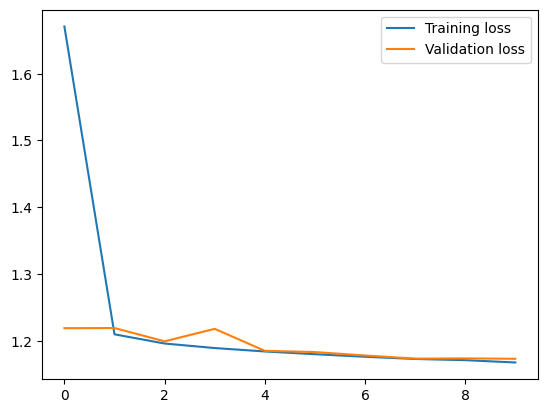

,distance,destination,source,price,surge_multiplier,id,product_id,name
134265,4.55,Financial District,Northeastern University,26.0,1.0,ada884e2-77d5-4d56-8511-0593774995e6,6c84fd89-3f11-4782-9b50-97c468b19529,Black


In [68]:
history.history

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()
uber.sample()

In [70]:
joblib.dump(pipe_rf ,'model.pkl')

['model.pkl']

In [71]:
# load model from file
model = joblib.load(open("model.pkl", "rb"))
prediction_data = [[1.1, 'West End', 'North End', 3, 'UberXL']]
model.predict(prediction_data)

c:\Users\Khadar Basha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([8.363897], dtype=float32)